## Analysis for paper

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as s

In [2]:
probsfile = '../results/euk_all.csv'
df = pd.read_csv(probsfile)
df.rename(columns = {'label tax':'tax'}, inplace=True)
con = lambda row :f'{row["Dataset"]}_{row["Baltimore"]}' 
df['Dataset'] = df.apply ( con, axis =1)



In [3]:
df.drop(columns= [ 'Unnamed: 0'], inplace=True)
df.head()

,Dataset,N in class,Features,k,AUC,Baltimore,Feature set,tax,label
0,Aedes_genus_RNA,67,AA,1,0.769,RNA,AA_1,genus,Aedes
1,Aedes_genus_RNA,67,AA,2,0.639,RNA,AA_2,genus,Aedes
2,Aedes_genus_RNA,67,AA,3,0.815,RNA,AA_3,genus,Aedes
3,Aedes_genus_RNA,67,AA,4,0.769,RNA,AA_4,genus,Aedes
4,Aedes_genus_RNA,67,DNA,1,0.490,RNA,DNA_1,genus,Aedes


In [4]:
ss = df[(df['tax'].isin(['phylum','genus']))]
ss.groupby(['tax','Feature set']).describe()

AUC                                                       \
                   count      mean       std    min      25%     50%      75%   
tax    Feature set                                                              
genus  AA_1         11.0  0.653727  0.166845  0.349  0.50700  0.7270  0.76250   
       AA_2         11.0  0.690273  0.156671  0.410  0.60650  0.7620  0.79200   
       AA_3         11.0  0.740455  0.115601  0.531  0.66000  0.7640  0.82500   
       AA_4         11.0  0.755818  0.106477  0.578  0.68500  0.7690  0.80950   
       DNA_1        11.0  0.561273  0.170582  0.242  0.46800  0.5020  0.69150   
       DNA_2        11.0  0.653818  0.091977  0.554  0.58900  0.6200  0.70350   
       DNA_3        11.0  0.652545  0.140643  0.440  0.55800  0.6410  0.74700   
       DNA_4        11.0  0.633273  0.132787  0.406  0.58500  0.6850  0.69550   
       DNA_5        11.0  0.660727  0.122788  0.407  0.59600  0.6770  0.73950   
       DNA_6        11.0  0.705636  0.116697  0.492  0.66500  0.7290  0.79750   
       DNA_7        11.0  0.682727  0.149217  0.341  0.63850  0.7290  0.78550   
       DNA_8        11.0  0.673727  0.139440  0.460  0.56500  0.7730  0.78700   
       DNA_9        11.0  0.691364  0.127217  0.421  0.61950  0.7320  0.79550   
       Domain_1     11.0  0.715727  0.169368  0.389  0.68400  0.7810  0.81850   
       PC_1         11.0  0.610273  0.102098  0.413  0.53950  0.6390  0.69800   
       PC_2         11.0  0.597455  0.157120  0.375  0.47800  0.5740  0.70400   
       PC_3         11.0  0.686727  0.114948  0.500  0.62500  0.7350  0.74450   
       PC_4         11.0  0.700545  0.145915  0.453  0.60400  0.6810  0.81650   
       PC_5         11.0  0.757727  0.095243  0.578  0.70050  0.7730  0.81100   
       PC_6         11.0  0.753364  0.110304  0.500  0.70950  0.7640  0.81050   
phylum AA_1         18.0  0.894944  0.080409  0.725  0.84700  0.8975  0.96475   
       AA_2         18.0  0.931778  0.065403  0.788  0.88250  0.9490  0.99025   
       AA_3         18.0  0.946278  0.065395  0.747  0.92825  0.9725  0.99250   
       AA_4         18.0  0.940000  0.064665  0.785  0.90925  0.9695  0.99175   
       DNA_1        18.0  0.595333  0.128953  0.396  0.51700  0.5825  0.67375   
       DNA_2        18.0  0.834944  0.093542  0.649  0.78050  0.8400  0.88900   
       DNA_3        18.0  0.890556  0.084815  0.737  0.85450  0.9060  0.96325   
       DNA_4        18.0  0.899778  0.085619  0.692  0.84250  0.9050  0.98100   
       DNA_5        18.0  0.921722  0.068216  0.805  0.86650  0.9265  0.98950   
       DNA_6        18.0  0.927222  0.075633  0.737  0.89150  0.9315  0.98975   
       DNA_7        18.0  0.929444  0.070186  0.768  0.89950  0.9325  0.98975   
       DNA_8        18.0  0.928222  0.068340  0.788  0.90225  0.9345  0.99075   
       DNA_9        18.0  0.925889  0.071869  0.768  0.88875  0.9460  0.99025   
       Domain_1     18.0  0.939389  0.049275  0.867  0.89075  0.9525  0.98675   
       PC_1         18.0  0.780333  0.130297  0.606  0.66050  0.7585  0.89450   
       PC_2         18.0  0.866611  0.111327  0.608  0.78350  0.8785  0.95625   
       PC_3         18.0  0.904500  0.088160  0.703  0.86025  0.9150  0.98275   
       PC_4         18.0  0.936333  0.064243  0.787  0.90075  0.9680  0.98950   
       PC_5         18.0  0.939111  0.057992  0.808  0.91725  0.9530  0.98400   
       PC_6         18.0  0.937722  0.056288  0.826  0.90775  0.9445  0.99225   

                          N in class                                        \
                      max      count        mean         std   min     25%   
tax    Feature set                                                           
genus  AA_1         0.841       11.0   63.272727   40.445249  31.0   39.50   
       AA_2         0.862       11.0   63.272727   40.445249  31.0   39.50   
       AA_3         0.907       11.0   63.272727   40.445249  31.0   39.50   
       AA_4         0.926       11.0   63.272727   40.445249  31.0   

In [5]:
resultsfile = 'Bacteria_DNA_results.csv'

dfB = pd.read_csv(resultsfile)

dfB.rename(columns = {'label tax group':'tax', 'positive label':'label' }, inplace=True)
con = lambda row :f'{row["label"]}_{row["tax"]}_{row["Baltimore"]}' 
dfB['Dataset'] = dfB.apply ( con, axis =1)

In [6]:
dfB.columns
dfB.drop(columns= [ 'pool label', 'pool tax group','accuracy', 'specificity',
       'sensitivity', 'TN/FP/FN/TP'], inplace =True)


In [7]:
fs = lambda row: f'{row["Features"]}_{row["k"]}'
dfB['Feature set'] = dfB.apply(fs,axis = 1)
dfB.head()

,label,tax,Baltimore,N in class,Features,k,AUC,Dataset,Feature set
0,Alteromonadales,order,DNA,45,DNA,1,0.864,Alteromonadales_order_DNA,DNA_1
1,Alteromonadales,order,DNA,45,DNA,2,0.918,Alteromonadales_order_DNA,DNA_2
2,Alteromonadales,order,DNA,45,DNA,3,0.918,Alteromonadales_order_DNA,DNA_3
3,Alteromonadales,order,DNA,45,DNA,4,0.936,Alteromonadales_order_DNA,DNA_4
4,Alteromonadales,order,DNA,45,DNA,5,0.982,Alteromonadales_order_DNA,DNA_5


In [8]:
correct_b = lambda row:'dsDNA' if row['Baltimore']== 'DNA' else row['Baltimore']
dfB['Baltimore']= dfB.apply(correct_b , axis=1)
set(dfB['Baltimore'])

{'dsDNA'}

In [9]:
dfs = [df.set_index(['Dataset', 'N in class', 'Features', 'k', 'AUC', 'Baltimore',
       'Feature set', 'tax', 'label']) for df in [df, dfB]]

results = (pd.concat(dfs, axis=1).reset_index())

In [ ]:
results.head(50)

In [10]:
tax_order =['kingdom','phylum','class','order','family','genus','species']
fs_order =['DNA_1','DNA_2','DNA_3','DNA_4','DNA_5','DNA_6','DNA_7','DNA_8','DNA_9','AA_1','AA_2','AA_3','AA_4','PC_1','PC_2','PC_3','PC_4','PC_5','PC_6','Domain_1']


results['tax'] = results['tax'].astype('category')
results['tax'].cat.set_categories(tax_order, inplace=True)
results['Feature set'] = results['Feature set'].astype('category')
results['Feature set'].cat.set_categories(fs_order, inplace=True)
#results['Dataset'] = results['Dataset'].astype('category')
#results['Dataset'].cat.set_categories(tax_order, inplace=True)
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3737 entries, 0 to 3736
Data columns (total 9 columns):
Dataset        3737 non-null object
N in class     3737 non-null int64
Features       3737 non-null object
k              3737 non-null object
AUC            3737 non-null float64
Baltimore      3737 non-null object
Feature set    3737 non-null category
tax            3737 non-null category
label          3737 non-null object
dtypes: category(2), float64(1), int64(1), object(5)
memory usage: 212.9+ KB


In [ ]:
results[results['tax']=='phylum'].head(50)

In [45]:
results = df
#subset = results[(results['Feature set'].isin(fs_order)) & (results['tax'].isin(['kingdom','phylum','class','order']))]
subset = results[(results['tax'].isin(['kingdom','phylum','class','order']))]
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1720 entries, 80 to 2399
Data columns (total 9 columns):
Dataset        1720 non-null object
N in class     1720 non-null int64
Features       1720 non-null object
k              1720 non-null object
AUC            1720 non-null float64
Baltimore      1720 non-null object
Feature set    1720 non-null object
tax            1720 non-null object
label          1720 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 134.4+ KB


In [39]:
stats_b_t = ss.groupby(['tax']).describe().round()

In [40]:
stats_b_t.head(50)

AUC                                    N in class                \
        count mean  std  min  25%  50%  75%  max      count   mean    std   
tax                                                                         
genus   220.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0      220.0   63.0   39.0   
phylum  360.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0      360.0  658.0  863.0   

                                           
         min    25%    50%    75%     max  
tax                                        
genus   31.0   39.0   48.0   68.0   172.0  
phylum  55.0  116.0  318.0  655.0  3600.0

In [41]:

ss = dfB[dfB['Feature set'].isin(['DNA_2' ,'DNA_9','AA_1','AA_4', 'Domain_1'])]
ss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 1 to 1336
Data columns (total 9 columns):
label          335 non-null object
tax            335 non-null object
Baltimore      335 non-null object
N in class     335 non-null int64
Features       335 non-null object
k              335 non-null int64
AUC            335 non-null float64
Dataset        335 non-null object
Feature set    335 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 26.2+ KB


In [ ]:
results_gb =ss.groupby(['Feature set','tax']).describe()

In [ ]:
results_gb.head(300)

In [ ]:
gb_B_t_F= results_gb.round(2)
gb_B_t_F.to_csv('gb_B_t_F.csv')

In [71]:
#fs_order =['DNA_2','DNA_6','DNA_9','AA_1','AA_3', 'AA_4','PC_1','PC_6','Domain_1']
fs_order =['DNA_1','DNA_2','DNA_3','DNA_4','DNA_5','DNA_6','DNA_7','DNA_8','DNA_9','AA_1','AA_2','AA_3','AA_4','PC_1','PC_2','PC_3','PC_4','PC_5','PC_6','Domain_1']
tax_order =  ['phylum','class','order']#,'family','genus','species']
                    
balt_order = ['all','RNA' ,'(+)ssRNA', '(-)ssRNA',  'dsRNA', 'dsDNA','ssDNA']

In [46]:
sns.set(font_scale=2, palette = 'viridis' )
g = sns.catplot(data=results  ,col_wrap=2, height=10,aspect =2, 
                  margin_titles=True,  legend_out = True,
                    x = 'Feature set',y = 'AUC', hue = 'tax',
                    kind = 'box',
                    hue_order = tax_order,
                    palette='viridis',
                    order= fs_order,
                    dodge = True,
                    #sharex = False
                       )
g.set_xticklabels(rotation=30)        
plt.xticks(rotation='vertical')
g.set(ylim = (0.5,1.02) ) 
plt.subplots_adjust(hspace = 0.1)

g.savefig('Figures/point_tax_Numbers_RNA.png', bbox_inches="tight", dpi=500)

ValueError: num must be 1 <= num <= 0, not 1

<Figure size 2880x0 with 0 Axes>

In [68]:
subset.head()


,Dataset,N in class,Features,k,AUC,Baltimore,Feature set,tax,label
80,Arachnida_class_(+)ssRNA,28,AA,1,0.753,(+)ssRNA,AA_1,class,Arachnida
81,Arachnida_class_(+)ssRNA,28,AA,2,0.840,(+)ssRNA,AA_2,class,Arachnida
82,Arachnida_class_(+)ssRNA,28,AA,3,0.877,(+)ssRNA,AA_3,class,Arachnida
83,Arachnida_class_(+)ssRNA,28,AA,4,0.852,(+)ssRNA,AA_4,class,Arachnida
84,Arachnida_class_(+)ssRNA,28,DNA,1,0.062,(+)ssRNA,DNA_1,class,Arachnida


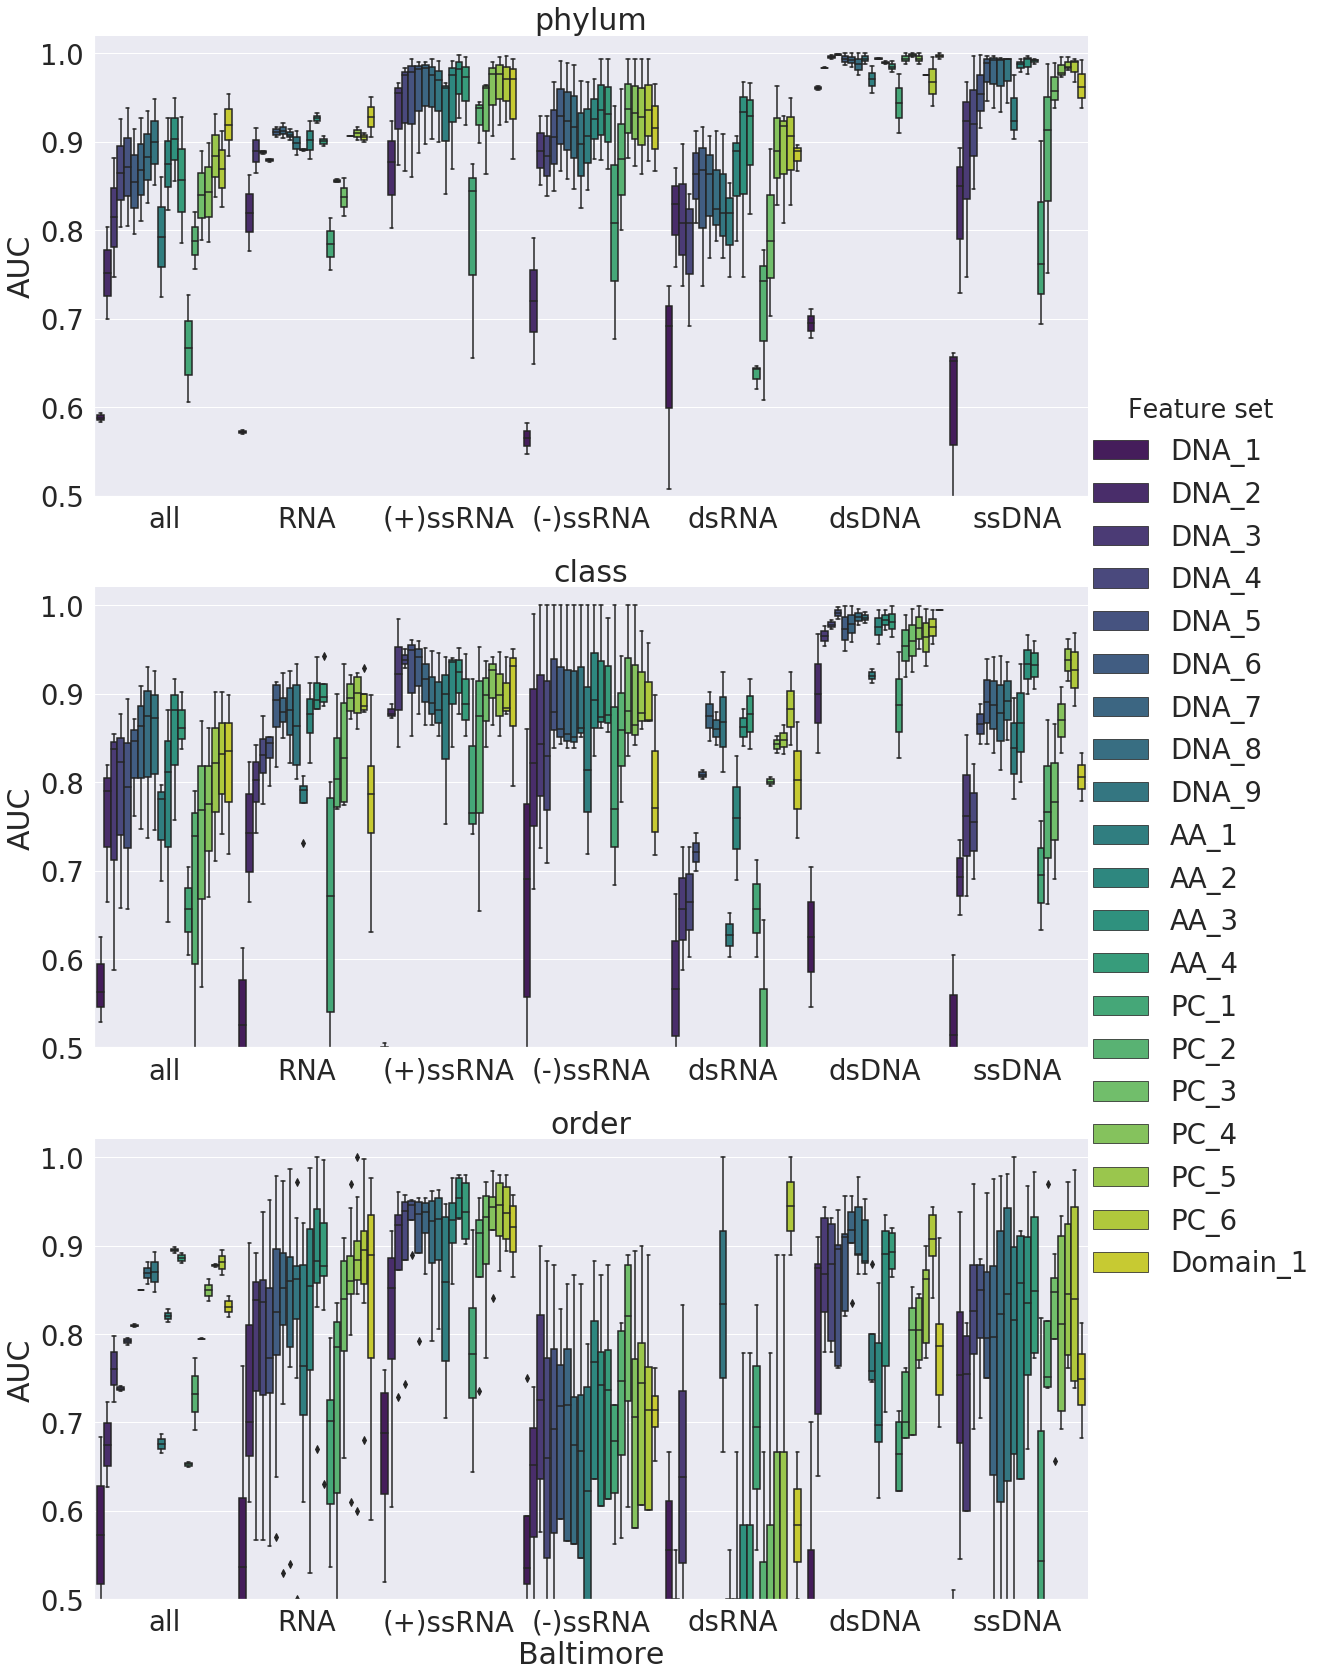

In [73]:

sns.set(font_scale=2.5 )
g = sns.catplot(data=subset , col= "tax",col_wrap=1, height=8,aspect =2, 
                  margin_titles=True, col_order=tax_order, legend_out = True,
                    x = 'Baltimore',y = 'AUC', hue = 'Feature set',
                    kind = 'box',
                    hue_order = fs_order,
                    palette='viridis',
                    order= balt_order,
                    dodge = True,
                    sharex = False,
                     width =.95 ,linewidth =1.5)
                  
g.set_titles('{col_name}' ,fontsize= 80)
g.set(ylim = (0.5,1.02) ) 
plt.subplots_adjust(hspace = 0.2)

#g.savefig('Figures/Euk_box_tax_Balt_RNA.PNG', bbox_inches="tight", dpi=300)

In [ ]:

sns.set(font_scale=1.8, palette = 'viridis' )
g = sns.catplot(data=subset , col= "tax",col_wrap=1, height=10,aspect =1.5, 
                  margin_titles=True, col_order=tax_order, legend_out = True,
                    hue = 'Baltimore',y = 'AUC', x = 'Feature set',
                    kind = 'box',
                    hue_order = balt_order,
                    palette='viridis',
                    order= fs_order,
                    dodge = True,
                     width =0.9,linewidth =1.5)
                  

g.set(ylim = (0.5,1.0) ) 


In [ ]:
#fs_order =['DNA_2','DNA_6','DNA_9','AA_1','AA_3', 'AA_4','PC_1','PC_6','Domain_1']
fs_order =['DNA_1','DNA_2','DNA_3','DNA_4','DNA_5','DNA_6','DNA_7','DNA_8','DNA_9','AA_1','AA_2','AA_3','AA_4','PC_1','PC_2','PC_3','PC_4','PC_5','PC_6','Domain_1']
tax_order =  ['phylum','class','order','family','genus','species']
                    
balt_order = ['all','RNA' ,'(+)ssRNA', '(-)ssRNA',  'dsRNA', 'dsDNA','ssDNA']

In [ ]:
domains =  results[(results['Feature set'].isin(['AA_4'])) ]
dom =  domains[~(domains['Baltimore'].isin(['Retro'])) ]
f, ax = plt.subplots(figsize=(20, 10))
marks = ('8','^', '<',  '>','v','X' ,'s')
sns.color_palette("plasma")
g = sns.scatterplot(x="N in class", y="AUC",hue ='tax',markers =marks,palette ='plasma_r',style = 'Baltimore', s=120,  data=dom)
g.set(xlim = (0,600) ) 
g.set (ylim = (0.5,1.02))
fig = g.get_figure()
plt.legend()
plt.xlabel (' Number of viruses in dataset')
fig.savefig('Figures/N_AUC_tax.png', bbox_inches="tight", dpi=300)

In [ ]:
dom.info()

In [ ]:
plt.subplots(figsize=(20, 10))
dom =  domains[~(domains['Baltimore'].isin(['Retro'])) ]
cm = plt.cm.get_cmap('cool')
tax_order =  ['kingdom','phylum','class','order','family','genus','species']
for px, py, c,  t in zip(dom['N in class'], dom.AUC ,dom.tax, dom.Baltimore):
    plt.scatter(px, py, marker=markers[t], c=cm(tax_order.index(c)/5), s= 60)
plt.legend()
plt.ylim(0.5,1.01)
plt.xlim(0,500)
plt.show()

In [ ]:
results.head()

In [ ]:

marks = ['o', 's', 'p', 'x', '^', '+', '*', '<', 'D' ]
markerdict = {}
for i,b in enumerate(balt_order):
    markers[b]= marks[i]
    

In [ ]:
domains =  results[(results['Feature set'].isin(['AA_4'])) ]

f, ax = plt.subplots(figsize=(20, 10))
g = sns.scatterplot(x="N in class", y="AUC",hue = 'Baltimore' , data=domains)
g.set(xlim = (0,500) ) 
g.set (ylim = (0.5,1.01))
fig = g.get_figure()    

fig.savefig('Figures/N_AUC.png', bbox_inches="tight", dpi=500)

sns.FacetGrid(tips, col="sex", hue="time", palette=pal,
...                   hue_order=["Dinner", "Lunch"],
...                   hue_kws=dict(marker=["^", "v"]))
>>> g = (g.map(plt.scatter, "total_bill", "tip", **kws)
...      .add_legend())

In [ ]:
results = dfB


In [ ]:
tax_order =['kingdom','phylum','class','order','family','genus','species']
fs_order =['DNA_1','DNA_2','DNA_3','DNA_4','DNA_5','DNA_6','DNA_7','DNA_8','DNA_9','AA_1','AA_2','AA_3','AA_4','PC_1','PC_2','PC_3','PC_4','PC_5','PC_6','Domain_1']


results['tax'] = results['tax'].astype('category')
results['tax'].cat.set_categories(tax_order, inplace=True)
results['Feature set'] = results['Feature set'].astype('category')
results['Feature set'].cat.set_categories(fs_order, inplace=True)
#results['Dataset'] = results['Dataset'].astype('category')
#results['Dataset'].cat.set_categories(tax_order, inplace=True)
results.info()

In [ ]:
results['Baltimore'] = results['Baltimore'].astype('category')
results['Baltimore'].cat.set_categories(balt_order, inplace=True)

In [12]:
fs_order =['DNA_1','DNA_2','DNA_3','DNA_4','DNA_5','DNA_6','DNA_7','DNA_8','DNA_9','AA_1','AA_2','AA_3','AA_4','PC_1','PC_2','PC_3','PC_4','PC_5','PC_6','Domain_1']
tax_order =  ['phylum','class','order','family','genus','species']
f_order = ['DNA','AA','PC','Domain']                   
balt_order = ['all','RNA' ,'(+)ssRNA', '(-)ssRNA',  'dsRNA', 'dsDNA','ssDNA']

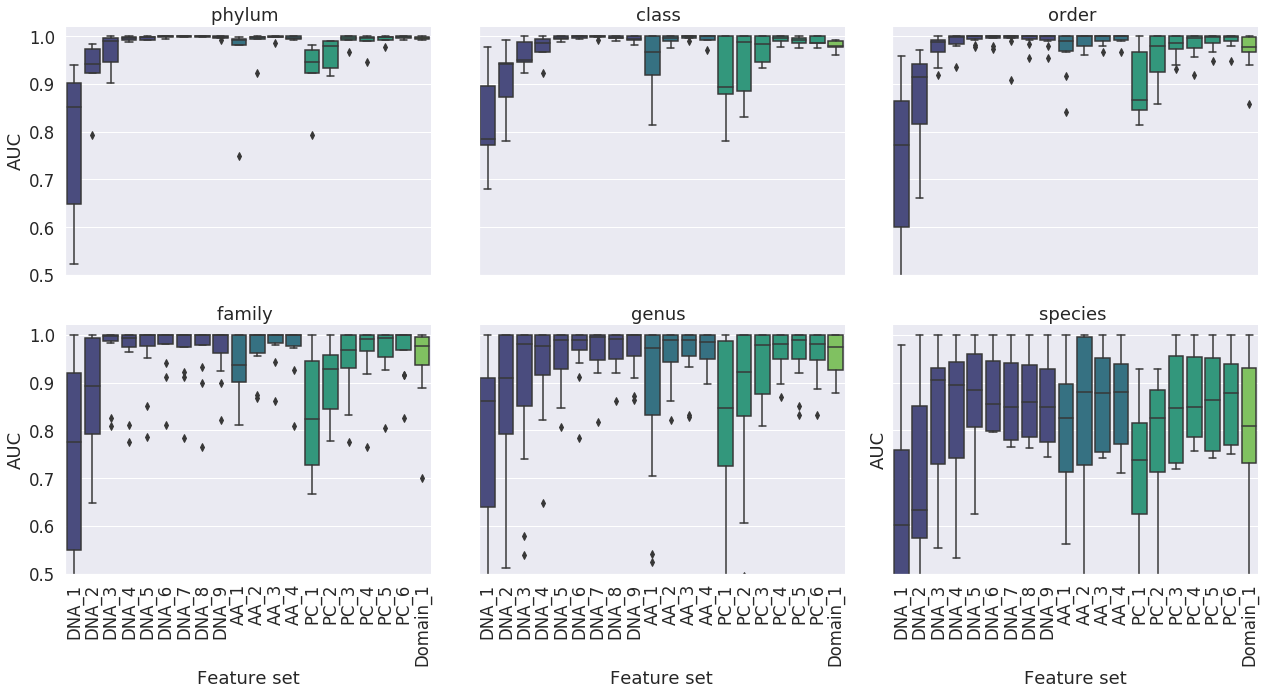

In [37]:

sns.set(font_scale=1.5, palette = 'viridis' )
g = sns.catplot(data=dfB , col= "tax",col_wrap=3, height=5,aspect =1.2, 
                  margin_titles=True, col_order=tax_order, legend = False,
                    x = 'Feature set',y = 'AUC', hue = 'Features',
                    kind = 'box',
                    hue_order = f_order,
                    palette='viridis',
                    order= fs_order,
                    dodge = False,
                    sharex = True,
                     )
                  
g.set_xticklabels(rotation=90)
g.set(ylim = (0.5,1.02) ) 
g.set_titles(("{col_name} "),fontsize= 200)
plt.subplots_adjust(hspace = 0.2)
plt.xlabel("Feature set")
plt.ylabel("AUC")
plt.tight_layout()
g.savefig('Figures/box_tax_BAct.png', bbox_inches="tight", dpi=300)

In [84]:
tax_order =['kingdom','phylum','class','order','family','genus','species']
fs_order =['DNA_1','DNA_2','DNA_3','DNA_4','DNA_5','DNA_6','DNA_7','DNA_8','DNA_9','AA_1','AA_2','AA_3','AA_4','PC_1','PC_2','PC_3','PC_4','PC_5','PC_6','Domain_1']


df['tax'] = df['tax'].astype('category')
results['tax'].cat.set_categories(tax_order, inplace=True)
df['Feature set'] = df['Feature set'].astype('category')
df['Feature set'].cat.set_categories(fs_order, inplace=True)

In [103]:
df2.head()

Feature set,DNA_1,DNA_2,DNA_3,DNA_4,DNA_5,DNA_6,DNA_7,DNA_8,DNA_9,AA_1,AA_2,AA_3,AA_4,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,Domain_1
Dataset,,,,,,,,,,,,,,,,,,,,
k_Viridiplantae_kingdom_all,0.587,0.718,0.862,0.923,0.941,0.940,0.965,0.975,0.977,0.880,0.959,0.982,0.956,0.712,0.860,0.915,0.926,0.971,0.967,0.973
k_Metazoa_kingdom_dsRNA,0.324,0.859,0.907,0.892,0.920,0.936,0.944,0.944,0.945,0.841,0.891,0.924,0.978,0.702,0.806,0.865,0.898,0.908,0.948,0.894
k_Metazoa_kingdom_ssDNA,0.656,0.891,0.963,0.981,0.988,0.992,0.990,0.990,0.987,0.974,0.990,0.982,0.983,0.857,0.970,0.984,0.990,0.987,0.986,0.972
k_Metazoa_kingdom_(-)ssRNA,0.703,0.803,0.977,0.983,0.984,0.993,0.998,0.993,0.970,0.995,1.000,1.000,1.000,0.974,0.981,1.000,1.000,1.000,1.000,0.986
k_Metazoa_kingdom_(+)ssRNA,0.432,0.906,0.963,0.983,0.987,0.994,0.997,0.997,0.996,0.971,0.990,0.999,0.999,0.893,0.963,0.980,0.998,0.999,0.999,0.980


In [79]:
concat_ds = lambda row: f'{row["tax"][0]}_{row["Dataset"]} '
df['Dataset']= df.apply(concat_ds , axis=1)

In [88]:
df1 = df.sort_values('tax')
unique =[]
[unique.append(ds) for ds in(list(df1['Dataset']))if ds not in unique ]
unique

['k_Viridiplantae_kingdom_all ',
 'k_Metazoa_kingdom_dsRNA ',
 'k_Metazoa_kingdom_ssDNA ',
 'k_Metazoa_kingdom_(-)ssRNA ',
 'k_Metazoa_kingdom_(+)ssRNA ',
 'k_Metazoa_kingdom_all ',
 'k_Metazoa_kingdom_Retro ',
 'k_Fungi_kingdom_dsRNA ',
 'k_Fungi_kingdom_all ',
 'k_Fungi_kingdom_(+)ssRNA ',
 'k_Metazoa_kingdom_dsDNA ',
 'k_Viridiplantae_kingdom_(-)ssRNA ',
 'k_Viridiplantae_kingdom_(+)ssRNA ',
 'k_Viridiplantae_kingdom_dsRNA ',
 'k_Viridiplantae_kingdom_ssDNA ',
 'p_Chordata_phylum_Retro ',
 'p_Chordata_phylum_(-)ssRNA ',
 'p_Chordata_phylum_dsDNA ',
 'p_Chordata_phylum_RNA ',
 'p_Chordata_phylum_ssDNA ',
 'p_Chordata_phylum_dsRNA ',
 'p_Chordata_phylum_(+)ssRNA ',
 'p_Arthropoda_phylum_dsDNA ',
 'p_Chordata_phylum_all ',
 'p_Streptophyta_phylum_(+)ssRNA ',
 'p_Streptophyta_phylum_dsRNA ',
 'p_Arthropoda_phylum_ssDNA ',
 'p_Arthropoda_phylum_all ',
 'p_Arthropoda_phylum_dsRNA ',
 'p_Streptophyta_phylum_(-)ssRNA ',
 'p_Arthropoda_phylum_(+)ssRNA ',
 'p_Arthropoda_phylum_RNA ',
 'p_Stre

In [93]:
ds = (df['Dataset')

119

In [102]:
dfp = df1.pivot_table(index='Dataset',columns='Feature set', values ='AUC')
df2 = dfp.reindex(unique)

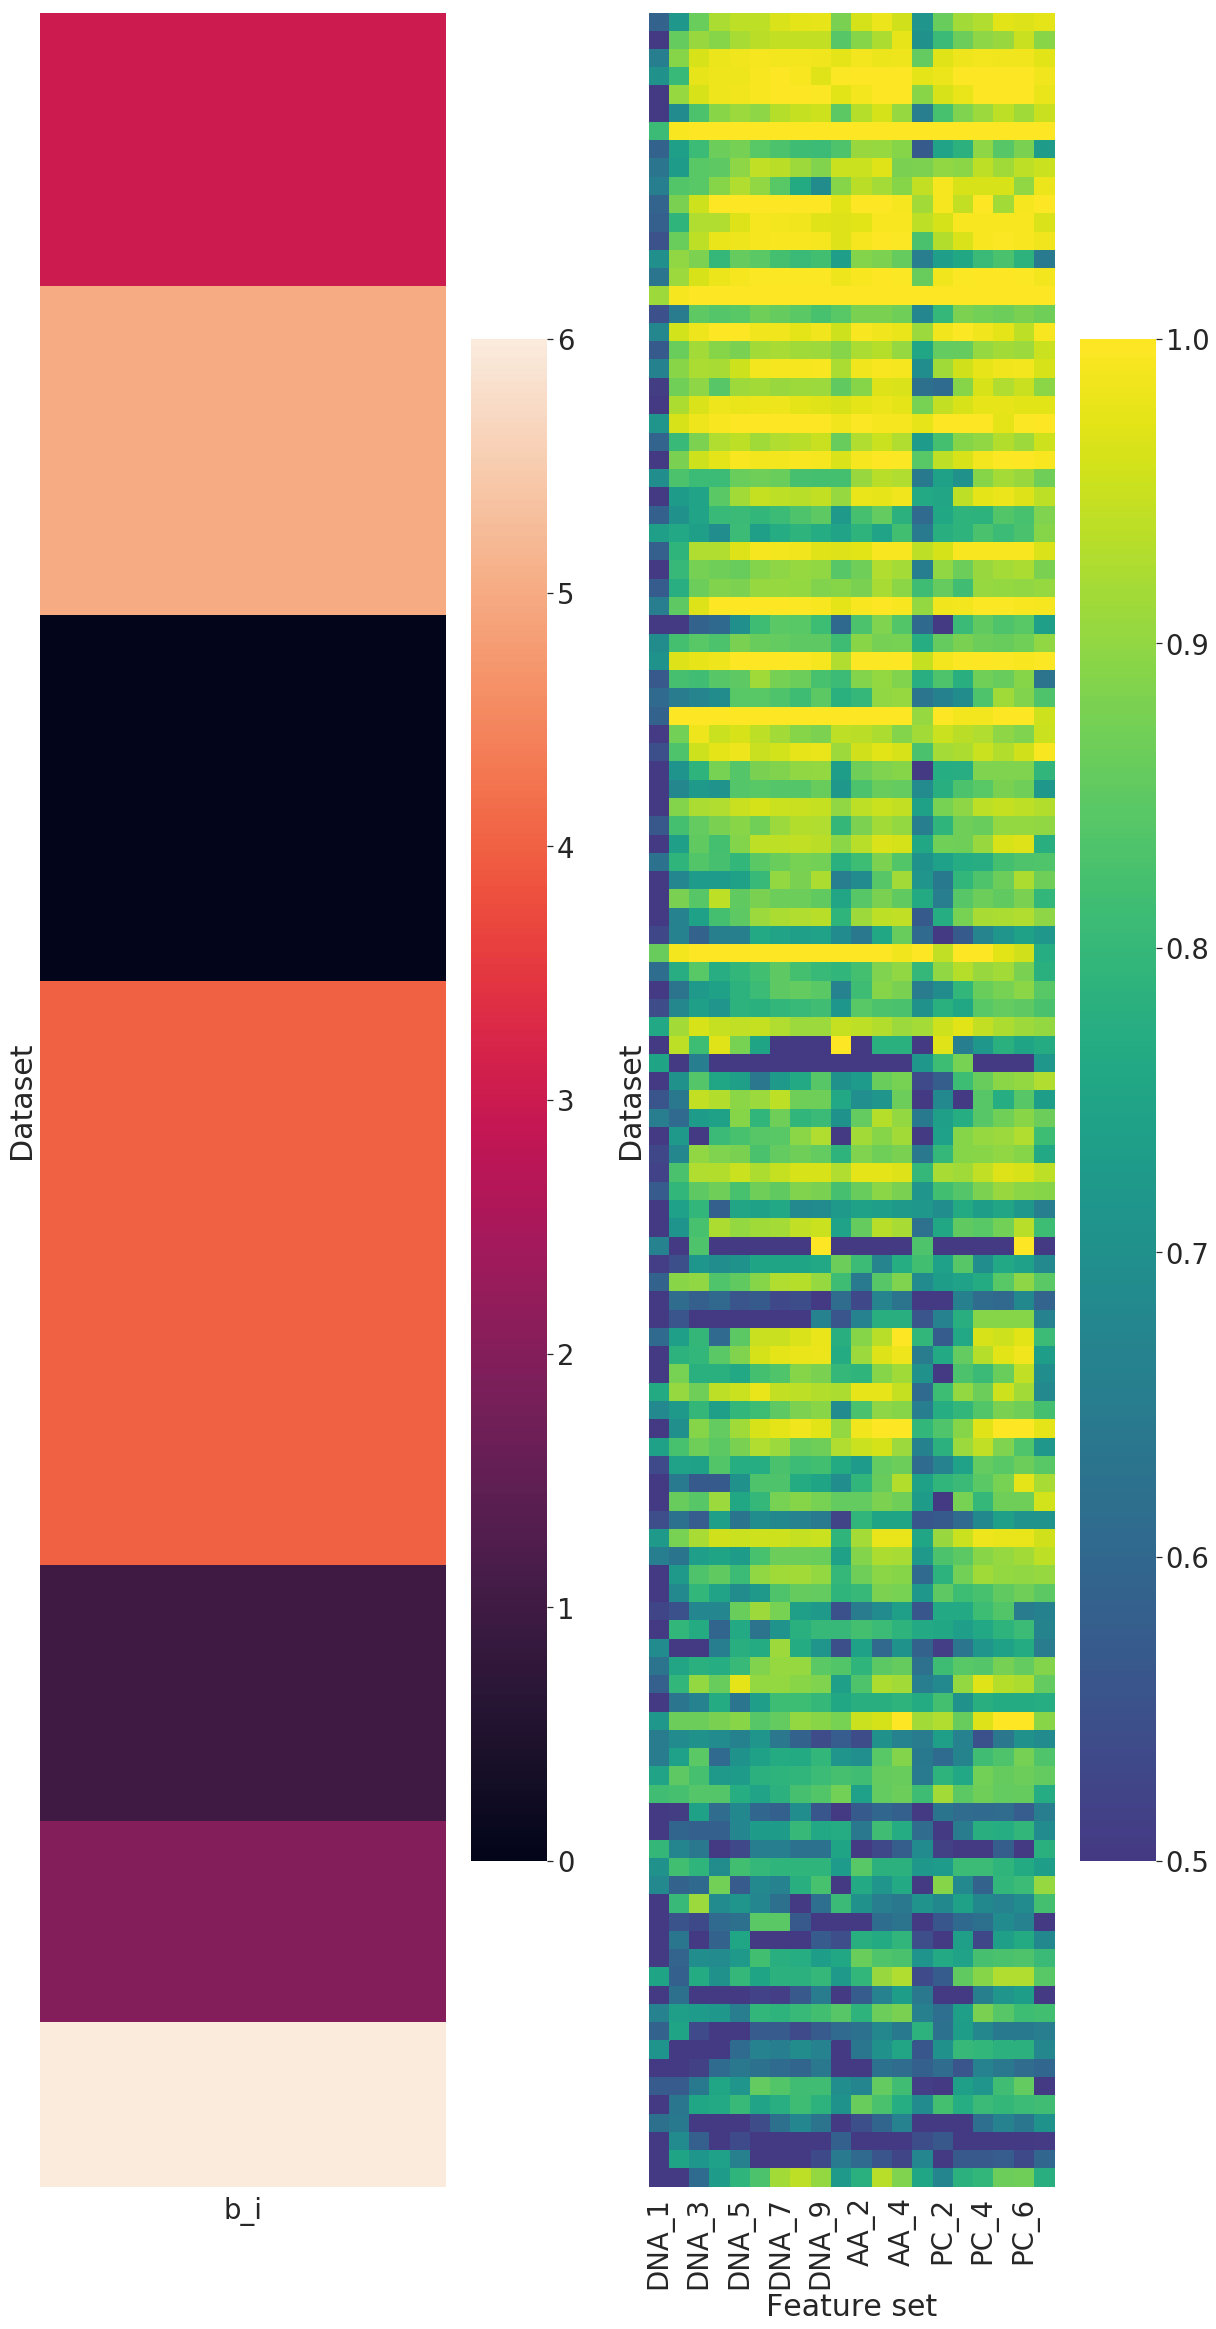

In [178]:
# Draw a heatmap with the numeric values in each cell
sns.set(font_scale=2.5)
f, ax = plt.subplots(1,2,figsize=(20, 40))
ax[0].tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right=False,      # ticks along the bottom edge are off
     left=False,         # ticks along the top edge are off
    labelleft=False
    )
ax[1].tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right=False,      # ticks along the bottom edge are off
     left=False,         # ticks along the top edge are off
    labelleft=False
    )
# ax[0].set_ylabel(ax.get_ylabel(), fontsize=25)
# ax[0].set_xlabel(ax.get_xlabel(), fontsize=25)
sns.heatmap(bdf, ax=ax[0])
sns.heatmap(df2,cmap = 'viridis',center =0.7, vmin = 0.5,   ax=ax[1])
f.savefig('Figures/heatmap_Bact_wo_ds.svg', bbox_inches="tight")

Text(998.972,0.5,'')

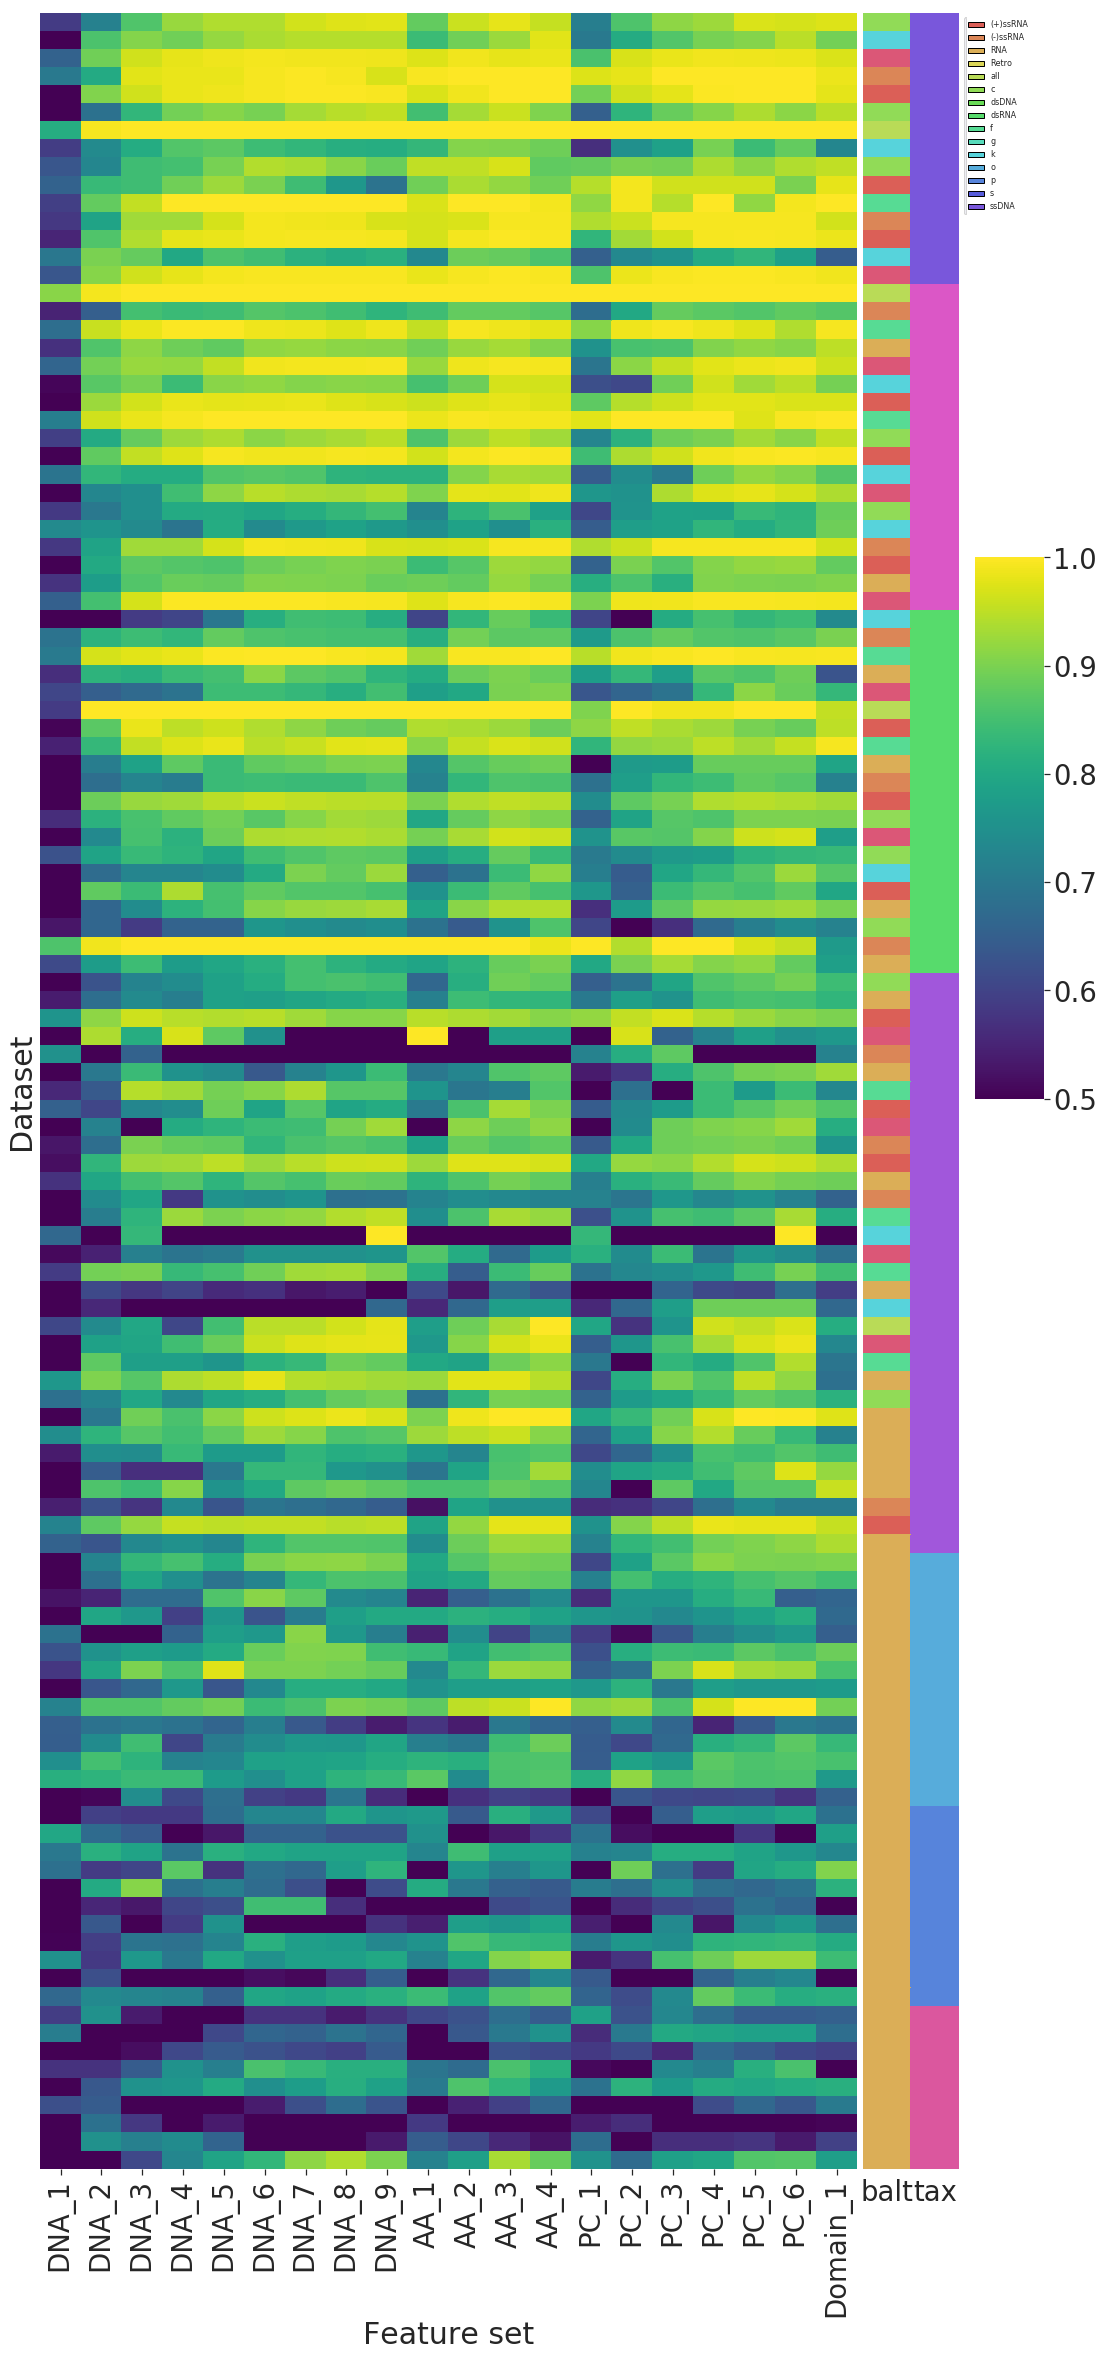

In [296]:
fig = plt.figure(figsize=(20,40))
ax1 = plt.subplot2grid((120,30), (0,0), colspan=22, rowspan=119)
ax2 = plt.subplot2grid((120,30), (0,22), colspan=3, rowspan=119)
#ax3 = plt.subplot2grid((120,30), (0,2), colspan=2, rowspan=119)
#ax5 = plt.subplot2grid((120,30), (10,27), colspan=2, rowspan=30)
ax6 = plt.subplot2grid((120,30), (30,25), colspan=2, rowspan=30)




sns.heatmap(df2, ax=ax1,vmin = 0.5,cbar = True, cbar_ax = ax6,  cmap="viridis")
ax1.xaxis.tick_bottom()
ax1.set_xticklabels(df2.columns,rotation=90)
ax1.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right=False,      # ticks along the bottom edge are off
     left=False,         # ticks along the top edge are off
    labelleft=False
    )
ax2.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right=False,      # ticks along the bottom edge are off
     left=False,         # ticks along the top edge are off
    labelleft=False
    )
pal= sns.color_palette('hls',20)
#ax2.set_ylabel(False)
c = catheat.heatmap( dfbalt[['balt','tax']],palette=pal,ax = ax2)
c.yaxis.set_label_text('')
# sns.heatmap(bdf, ax=ax2,   cmap="YlGnBu", cbar=True, cbar_ax = ax4, xticklabels=False, yticklabels=False)
# sns.heatmap(tdf, ax=ax3, cmap = 'plasma',   cbar=True,cbar_ax = ax5, xticklabels=False, yticklabels=False)

In [299]:
fig.savefig('Figures/hm_no_labs.png', bbox_inches="tight", dpi=300)

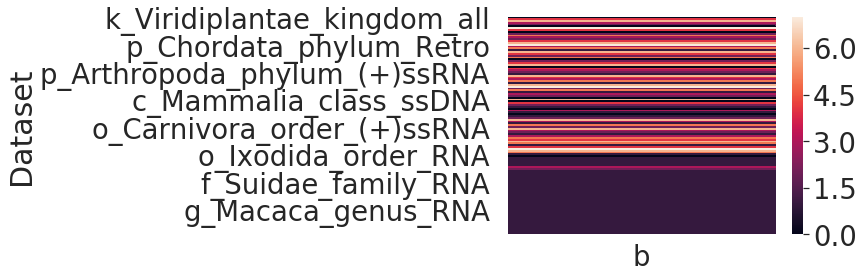

In [207]:
#fig, ax =plt.subplots(1,2)

#sns.heatmap(uniform_data, ax=ax[0])
sns.heatmap(bdfbalt['b'])

#plt.show(df1[df2['Dataset']]['Baltimore'])

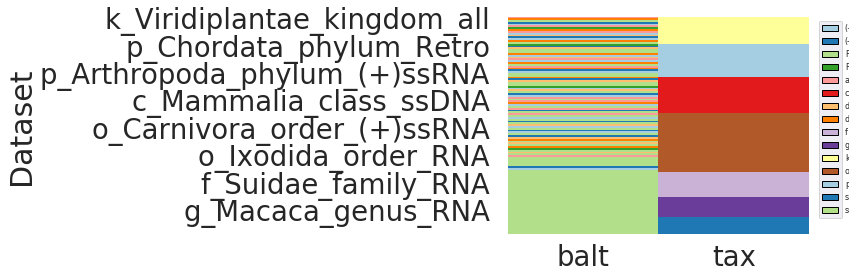

In [254]:
import catheat
catheat.heatmap( dfbalt[['balt','tax']],
                      palette='Paired' )


In [201]:
dfbalt=  pd.DataFrame (index =df2.index)
dfbalt['ds'] = dfbalt.index
taxfn = lambda row: (row['ds'][0])
dfbalt['tax'] = dfbalt.apply (taxfn, axis =1)
bf = lambda row: tax_order.index(row['tax'])
dfbalt['t'] = dfbalt.apply (bf, axis =1)
baltfn = lambda row: (row['ds'].split('_')[-1].strip())
dfbalt['balt'] = dfbalt.apply (baltfn, axis =1)
bf = lambda row: balt_order.index(row['balt'])
dfbalt['b'] = dfbalt.apply (bf, axis =1)


In [209]:
bdf =pd.DataFrame( dfbalt['b'])
tdf =pd.DataFrame( dfbalt['t'])
dfbalt.head()

,ds,tax,t,balt,b
Dataset,,,,,
k_Viridiplantae_kingdom_all,k_Viridiplantae_kingdom_all,k,0,all,0
k_Metazoa_kingdom_dsRNA,k_Metazoa_kingdom_dsRNA,k,0,dsRNA,4
k_Metazoa_kingdom_ssDNA,k_Metazoa_kingdom_ssDNA,k,0,ssDNA,6
k_Metazoa_kingdom_(-)ssRNA,k_Metazoa_kingdom_(-)ssRNA,k,0,(-)ssRNA,3
k_Metazoa_kingdom_(+)ssRNA,k_Metazoa_kingdom_(+)ssRNA,k,0,(+)ssRNA,2


In [221]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, k_Viridiplantae_kingdom_all  to s_Sus scrofa_species_RNA 
Data columns (total 1 columns):
t    119 non-null int64
dtypes: int64(1)
memory usage: 6.9+ KB


In [170]:
bdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, k_Viridiplantae_kingdom_all  to s_Sus scrofa_species_RNA 
Data columns (total 1 columns):
b_i    119 non-null int64
dtypes: int64(1)
memory usage: 6.9+ KB


In [147]:
blist = ['c', 'f', 'g', 'k', 'o', 'p', 's']

In [151]:
blist.index('k')

3

In [150]:
blist

['c', 'f', 'g', 'k', 'o', 'p', 's']

In [155]:
type (dfbalt.balt[0])

str

In [200]:
fs_order =['DNA_1','DNA_2','DNA_3','DNA_4','DNA_5','DNA_6','DNA_7','DNA_8','DNA_9','AA_1','AA_2','AA_3','AA_4','PC_1','PC_2','PC_3','PC_4','PC_5','PC_6','Domain_1']
tax_order =  ['k','p','c','o','f','g','s']
               
balt_order = ['all','RNA' ,'(+)ssRNA', '(-)ssRNA',  'dsRNA', 'dsDNA','ssDNA','Retro']